# Heart failure prediction using Machine Learning

## Exploratory Data Analysis

### Project setup

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder


In [2]:
# Dataset directory
data_root = "../../data/heart.csv"

### Initial observations

In [3]:
dataDF = pd.read_csv(data_root)
dataDF

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
print("Number of samples: ", len(dataDF))
print("Number of features: ", len(dataDF.columns) - 1)
target_column = "HeartDisease"
features = dataDF.columns.drop(target_column)
print("Features: ", list(features))

Number of samples:  918
Number of features:  11
Features:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


#### Missing values

In [5]:
missing_values = dataDF.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset has not missing values.

In [6]:
# FastingBS is a categorical feature, but it is encoded as a numerical one
dataDF["FastingBS"] = dataDF["FastingBS"].astype("object")

# Categorical features
categorical = dataDF.drop(columns=target_column).select_dtypes(include=['object']).columns

# Numerical features
numerical = dataDF.drop(columns=target_column).select_dtypes(include=['int64', 'float64']).columns

print("Categorical features: ", list(categorical))
print("Numerical features: ", list(numerical))

Categorical features:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical features:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [7]:
# Class distribution
dataDF[target_column].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Balanced dataset.

### Define train and test split

Implementing the EDA in the training part, will reduce bias.

In [8]:
trainDF, testDF = train_test_split(dataDF, test_size=0.2, random_state=13, stratify=dataDF[target_column])
dataDF = trainDF

In [9]:
print("Number of samples in the training set: ", len(trainDF))
print("Class distribution in the training set: ")
print(trainDF[target_column].value_counts())


Number of samples in the training set:  734
Class distribution in the training set: 
HeartDisease
1    406
0    328
Name: count, dtype: int64


In [10]:
print("Number of samples in the test set: ", len(testDF))
print("Class distribution in the test set: ")
print(testDF[target_column].value_counts())

Number of samples in the test set:  184
Class distribution in the test set: 
HeartDisease
1    102
0     82
Name: count, dtype: int64


### Analysis: Categorical features

In [23]:
# Unique values for each categorical feature
for column in categorical:
    print(column, dataDF[column].unique())

Sex ['M' 'F']
ChestPainType ['ASY' 'NAP' 'ATA' 'TA']
FastingBS [1 0]
RestingECG ['Normal' 'LVH' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [12]:
# Statistics of categorical features
dataDF[categorical].describe()


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,734,734,734,734,734,734
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,592,400,566,446,430,370


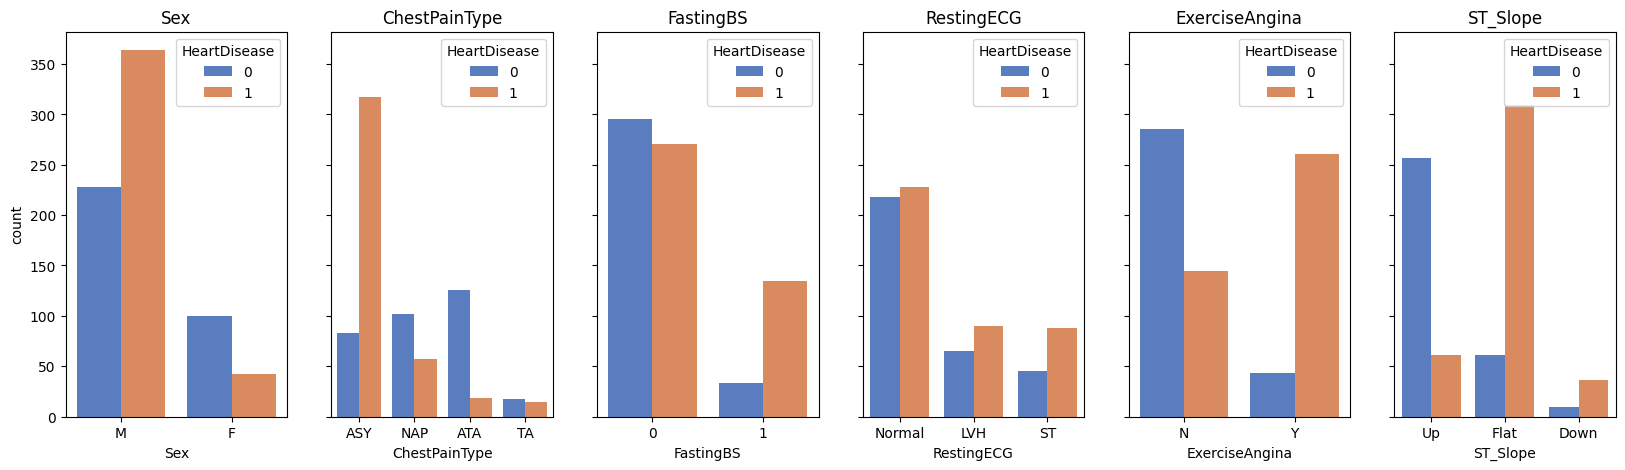

In [13]:
# Plot the distribution of categorical features
fig, axes = plt.subplots(1, len(categorical), figsize=(20, 5), sharey=True)

for i, col in enumerate(categorical):
    subplt = sns.countplot(x=col, data=dataDF, palette="muted", hue=target_column, ax=axes[i])
    subplt.set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

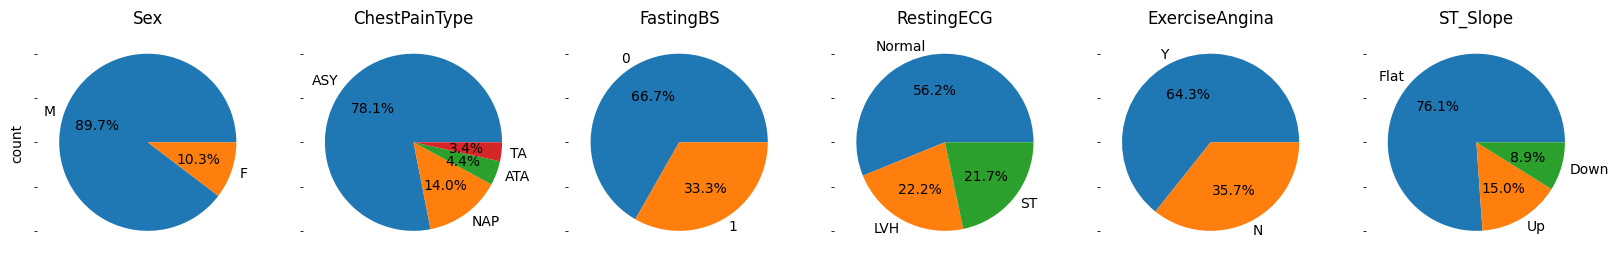

In [14]:
# Feature distribution for positive samples
positive_samples = dataDF[dataDF[target_column] == 1]

fig, axes = plt.subplots(1, len(categorical), figsize=(20, 5), sharey=True)

for i, col in enumerate(categorical):
    subplt = positive_samples[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i])
    subplt.set_title(col)


#### Summary

- **Gender and Heart Disease:**
  - **Male:** There are more males with heart disease than without.
  - **Female:** There are fewer females with heart disease compared to those without.
  - 89.7% of heart disease patients are male.

- **Chest Pain Type:**
  - **ASY Chest Pain:** A high likelihood of heart disease., as 78.1% of heart disease cases are associated with ASY chest pain.

- **Fasting Blood Sugar:**
  - Fasting blood sugar levels below 120 mg/dl have a high association with heart disease.

- **Resting ECG:**
  - Normal RestingECG levels account for 56.2% of heart disease cases.

- **Exercise-Induced Angina:**
  - Presence of exercise-induced angina significantly increases the probability of being diagnosed with heart disease.

- **ST Slope:**
  - **Flat Slope:** Indicates a very high probability of heart disease.

### Analysis: Numerical features

In [15]:
# Numeric features statistics
dataDF.drop(columns="HeartDisease").describe().T

,count,mean,std,min,25%,50%,75%,max
Age,734.0,53.643052,9.334213,28.0,47.0,54.0,60.0,77.0
RestingBP,734.0,133.006812,18.227641,0.0,120.0,130.0,140.0,200.0
Cholesterol,734.0,202.577657,110.064319,0.0,179.0,226.0,268.0,603.0
MaxHR,734.0,136.539510,25.299849,60.0,120.0,138.0,155.0,202.0
Oldpeak,734.0,0.885559,1.060610,-2.6,0.0,0.5,1.5,5.0


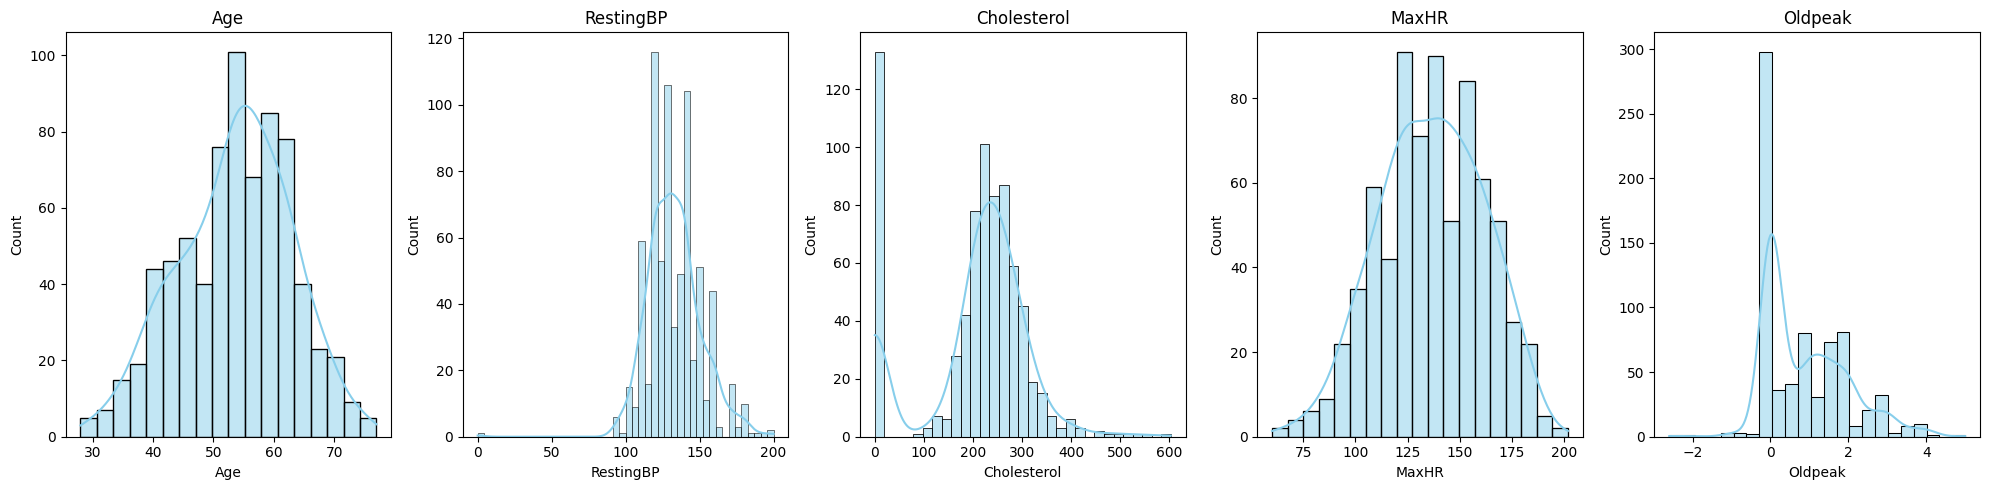

In [16]:
# Plot the distribution of numerical features
fig, axes = plt.subplots(1, len(numerical), figsize=(20, 5))

for i, col in enumerate(numerical):
    sns.histplot(dataDF[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

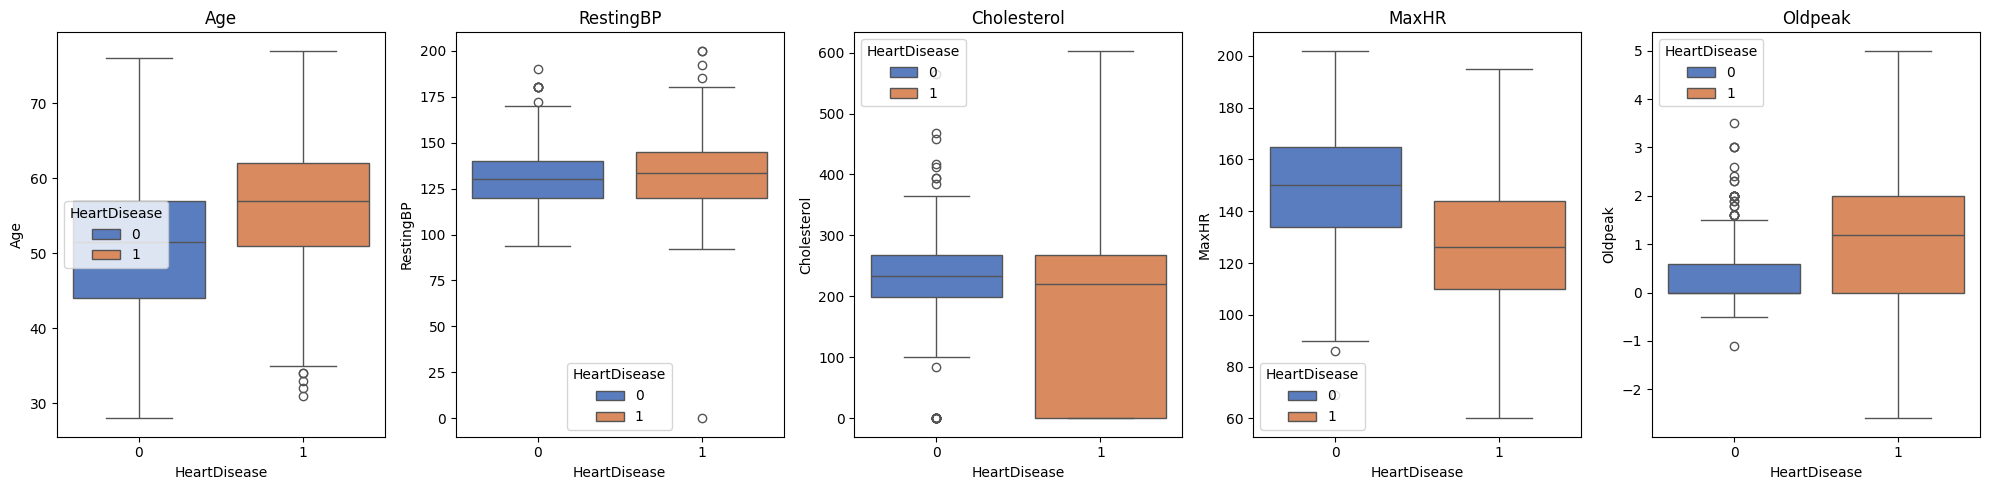

In [17]:
# Boxplot for numerical features
fig, axes = plt.subplots(1, len(numerical), figsize=(20, 5))

for i, col in enumerate(numerical):
    sns.boxplot(x=target_column, y=col, data=dataDF, ax=axes[i], palette="muted", hue=target_column)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### Summary

- **Age:**
  - **Heart Disease (1):** Patients tend to be older on average.
  - **No Heart Disease (0):** Patients tend to be younger.

- **Resting Blood Pressure (RestingBP):**
  - Resting blood pressure shows some variation but may not be a strong standalone predictor.

- **Cholesterol:**
  - **Heart Disease (1):** Lower median cholesterol levels with fewer outliers.
  - Cholesterol levels could be an important feature but need to be analyzed in conjunction with other factors. Some values are zero, which maybe is not real.

- **Maximum Heart Rate (MaxHR):**
  - **Heart Disease (1):** Lower maximum heart rates.
  - **No Heart Disease (0):** Higher maximum heart rates.
  - A lower maximum heart rate might be associated with an increased risk of heart disease.

- **ST Depression Induced by Exercise (Oldpeak):**
  - **Heart Disease (1):** Higher Oldpeak values, indicating greater ST depression.
  - **No Heart Disease (0):** Lower Oldpeak values with fewer outliers.

### Feature importance and selection

#### Numerical features importance using ANOVA

Numerical features importance:
Oldpeak        152.186305
MaxHR          146.910890
Age             52.800724
Cholesterol     32.605543
RestingBP        6.180674
dtype: float64


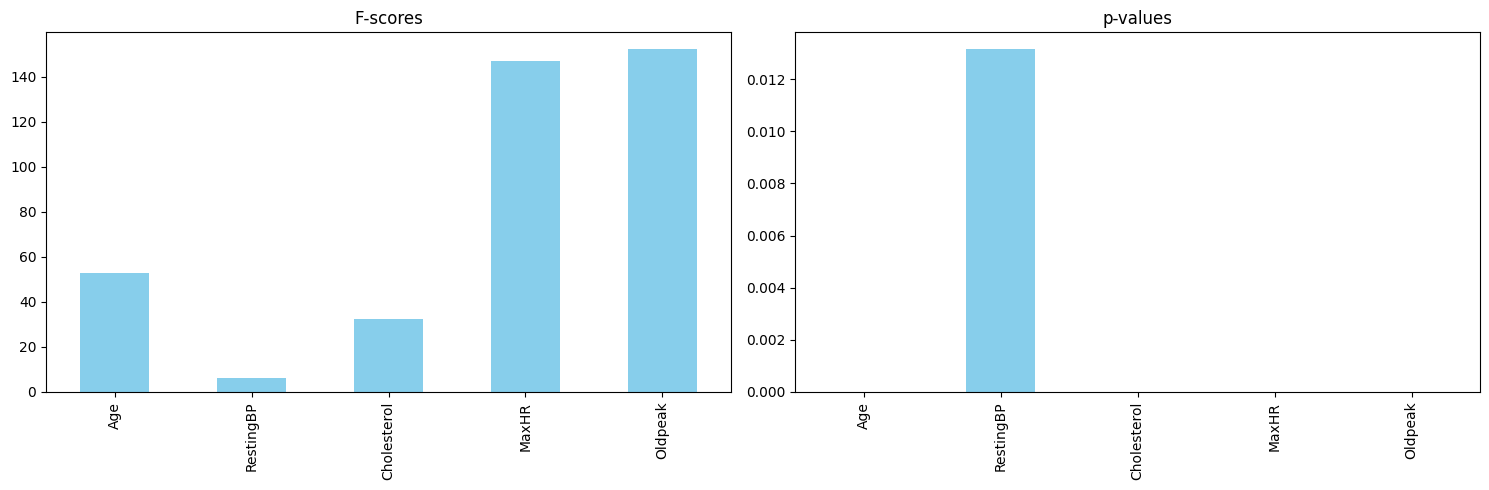

In [18]:
# Numerical features importance using ANOVA
f_scores, p_values = f_classif(dataDF[numerical], dataDF[target_column])
f_scores = pd.Series(f_scores, index=numerical)
p_values = pd.Series(p_values, index=numerical)

print("Numerical features importance:")
print(f_scores.sort_values(ascending=False))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

f_scores.plot(kind='bar', ax=axes[0], color="skyblue")
axes[0].set_title("F-scores")

p_values.plot(kind='bar', ax=axes[1], color="skyblue")
axes[1].set_title("p-values")

plt.tight_layout()
plt.show()

#### Categorical features importance using Chi Squared

Categorical features importance:
ChestPainType     128.923284
ExerciseAngina    114.725051
ST_Slope           63.292409
FastingBS          42.628660
Sex                 9.126946
RestingECG          0.587575
dtype: float64


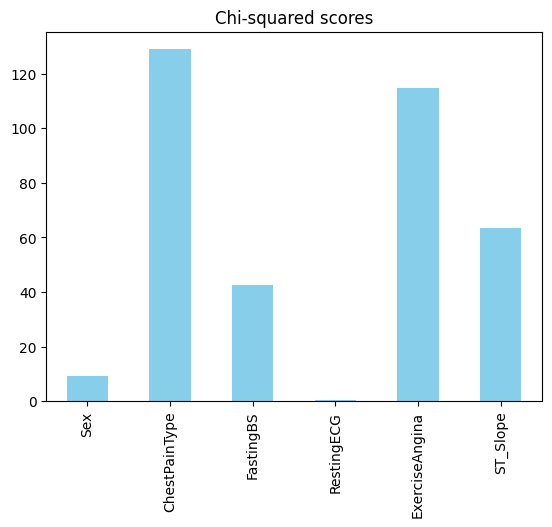

In [19]:
# Categorical features importance using Chi Squared

# Preprocess categorical features
encoder = LabelEncoder()

dataDF_encoded = dataDF.copy()
for col in categorical:
    dataDF_encoded[col] = encoder.fit_transform(dataDF[col])

chi_scores, p_values = chi2(dataDF_encoded[categorical], dataDF_encoded[target_column])
chi_scores = pd.Series(chi_scores, index=categorical)

print("Categorical features importance:")
print(chi_scores.sort_values(ascending=False))

# Plot the importance of categorical features
chi_scores.plot(kind='bar', color="skyblue")
plt.title("Chi-squared scores")
plt.show()



#### Summary

- **Highly Significant Features:**
  - **Age, Oldpeak and MaxHR**
  - **ChestPainType, ExerciseAngina, and ST_Slope**

- **Moderately Significant Features:**
  - **Cholesterol**
  - **FastingBS**

- **Less Significant Features:**
  - **RestingBP**
  - **Sex and RestingECG**

### Conclusion

The dataset was found to be balanced with no missing values, allowing for robust statistical analysis. Categorical features such as Gender, Chest Pain Type, Fasting Blood Sugar, Resting ECG, Exercise-Induced Angina, and ST Slope demonstrated significant associations with the target variable, HeartDisease. Specifically, males, those with ASY chest pain, lower fasting blood sugar levels, normal RestingECG levels, presence of exercise-induced angina, and flat ST Slope were highly correlated with heart disease.

Numerical features, including Age, Resting Blood Pressure, Cholesterol, Maximum Heart Rate, and Oldpeak, were also analyzed. Age and Oldpeak showed strong associations with heart disease, where patients with heart disease tended to be older and exhibit higher ST depression values. Maximum Heart Rate and Cholesterol levels showed moderate importance, suggesting a potential need for combined analysis with other features.

Feature importance analysis using ANOVA for numerical features and Chi-Squared tests for categorical features highlighted Age, Oldpeak, MaxHR, ChestPainType, ExerciseAngina, and ST_Slope as highly significant predictors. Cholesterol and FastingBS were moderately significant, while RestingBP, Sex, and RestingECG were less significant.

Due to the absence of collaboration with domain experts, it was not possible to replace outliers and zero values or exclude less significant features directly. However, the elimination of less important features would be implemented during the evaluation phase.

In [20]:
# Save the split datasets
trainDF.to_csv("../../data/train.csv", index=False)
testDF.to_csv("../../data/test.csv", index=False)